In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Levanto el archivo
eventos = pd.read_csv('data/events.csv', low_memory=False)

In [3]:
#el tiempo que es un object lo paso a Datetime
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'])

In [4]:
eventos.keys()

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [5]:
#cantidad de eventos por pais ##chequear abajo, no son eventos solo es 'visited site'
eventos['country'].value_counts().head(4)

Brazil           84308
Unknown           2313
United States      465
Argentina           94
Name: country, dtype: int64

In [6]:
eventos['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

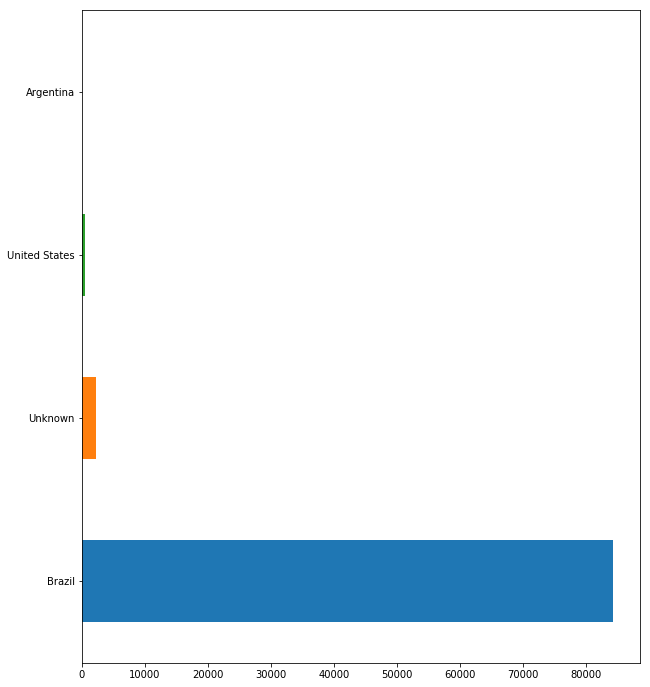

In [7]:
g1 = eventos['country'].value_counts().head(4)
g1 = g1.plot(kind= 'barh', figsize= (10,12))
plt.show()

## podemos ver claramente que Trocafone tiene a Brasil como principal activo

In [8]:
#Vemos dentro de Brasil que ciudades son las que mas eventos realizan
eventos_por_ciudad = eventos[eventos['country']=='Brazil']
eventos_por_ciudad = eventos[['region','city','event']]
#eventos_por_ciudad = eventos_por_ciudad.dropna()
eventos_por_ciudad = eventos_por_ciudad[eventos_por_ciudad['region'] != 'Unknown']
eventos_por_ciudad
#eventos_por_ciudad['event'].value_counts()

,region,city,event
0,NaN,NaN,ad campaign hit
1,Pernambuco,Camaragibe,visited site
2,NaN,NaN,viewed product
3,NaN,NaN,checkout
4,NaN,NaN,viewed product
5,Rio de Janeiro,Rio de Janeiro,visited site
6,NaN,NaN,ad campaign hit
7,NaN,NaN,checkout
8,NaN,NaN,generic listing
9,Rio de Janeiro,Rio de Janeiro,visited site


In [9]:
eventosFueraDeBrasil = eventos[eventos['country']!='Brazil']

eventosFueraDeBrasil = eventos[['region','city','event']]
eventosFueraDeBrasil = eventosFueraDeBrasil[eventosFueraDeBrasil['event']!='visited site']

eventosFueraDeBrasil['region'].value_counts()
#CON ESTO VEMOS QUE EL UNICO EVENTO QUE GUARDA LA LOCALIZACION DEL USUARIO ES 'visited site'
#eventosFueraDeBrasil[eventosFueraDeBrasil['event']!='visited site']['event'].value_counts()

Series([], Name: region, dtype: int64)

In [10]:
eventos['model'].value_counts()

iPhone 6                                     50916
iPhone 5s                                    44878
iPhone 6S                                    39296
iPhone 7                                     27556
Samsung Galaxy S7 Edge                       23926
Samsung Galaxy S7                            19337
iPhone 7 Plus                                18792
Samsung Galaxy S8                            16959
iPhone SE                                    16531
Samsung Galaxy J5                            13044
iPhone 6S Plus                               12855
iPhone 6 Plus                                12766
iPhone 5c                                    12689
Samsung Galaxy S6 Flat                       11608
Samsung Galaxy S6 Edge                       11175
Samsung Galaxy S8 Plus                       10502
iPhone 5                                      9342
Samsung Galaxy J7 Prime                       9312
Motorola Moto G4 Plus                         8080
Samsung Galaxy J7              

In [11]:
compras = eventos
compras = compras.dropna(subset=['url'])

numUrlCompras = compras[compras['url'].str.contains('comprar')]['url'].value_counts().sum()
numUrlVentas = compras[compras['url'].str.contains('vender')]['url'].value_counts().sum()
numUrlInicio = compras[compras['url']=='/']['url'].value_counts().sum()
asd = compras[~compras['url'].str.contains('comprar')]
asd = asd[~asd['url'].str.contains('vender')]
asd = asd[asd['url']!='/']['url'].value_counts().sum()

print(numUrlCompras)
print(numUrlVentas)
print(numUrlInicio)
print(asd)
#asd['url'].value_counts().sum()
#compras['url']

54209
221
28323
3


In [12]:
compras = eventos['url'].str.contains('comprar')

In [13]:
eventos.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [14]:
eventos["sistema operativo"] = eventos.apply( lambda x: str(x['operating_system_version']).split()[0], axis = 1)    

In [15]:
eventos["sistema operativo"].unique()

array(['nan', 'Android', 'Windows', 'iOS', 'Linux', 'Mac', 'Ubuntu',
       'Other', 'Chrome', 'Tizen'], dtype=object)

In [16]:
eventos_por_ciudad = eventos[eventos['country']=='Brazil']
asd =eventos_por_ciudad.drop_duplicates(subset='person', keep='first', inplace=False)
asd['person'].value_counts()
eventos.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'sistema operativo'],
      dtype='object')

In [ ]:
asd = eventos[['event','person']]
asd = asd.groupby('event').agg(np.size)
print(asd)
print()
print(eventos['event'].value_counts())